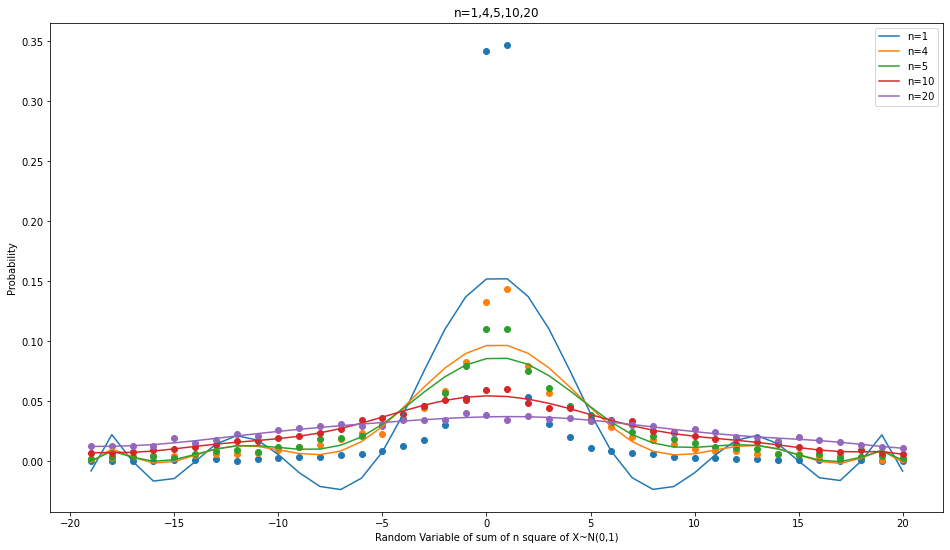

In [19]:
'''
x^2分布，卡方分布
by: Justin Peng
'''

import numpy as np
import math
import matplotlib.pyplot as plt

n_list = [1,4,5,10,20]
#n的取值范围
x_length = 10000
#每个批次随机采样多少个数
_y = []
#每批次采样得到的序列
x_data = []   
#取整的变量值（既平方和值）
y_data = []
#变量值对应的频率（归一化到0~1）
plt.figure(figsize=(16,9))
plt.title("n=%s"%",".join(str(i) for i in n_list))
plt.xlabel("Random Variable of sum of n square of X~N(0,1)")
plt.ylabel("Probability")

for _n in n_list:
    #n的不同取值
    _y.clear()
    #清空每个n对应的批次的x2和的值序列
    for num in range(1,x_length+1):
        #每个批次进行的采样次数
        _x2 = 0
        #平方和清零
        for _p in np.random.randn(_n):
            _x2 +=  pow(_p,3)
            #产生n个符合N(0,1)分布的随机值并求和
        if abs(_x2) < 20:
            _y.append(_x2)
        #记录平方和序列
    _y.sort()
    #完成批次采样后按值大小递增排序
    _min = min(_y)
    _len = len(_y)
    #每批次序列长度
    _start = -20
    #从0开始，计量该范围出现的样本次数，范围是（_start，_start+1）
    _cnt = 0
    x_data.clear()
    y_data.clear()
   
    for _ln in range(_len):
        if _y[_ln]>=_start and _y[_ln]<_start+1:
            _cnt += 1
            #在范围（_start，_start+1）就增加计数
            if _ln == _len-1:
                #还在当前范围之内，但到序列结尾就增加最后一次计数，退出循环
                x_data.append(_start+1)
                y_data.append(_cnt/_len)
                break
        else:

            if _ln == _len-1:
                #不在当前范围之内，但到序列结尾就增加当前累计与最后一次计数（本范围很明显只有一个数），退出循环
                x_data.append(_start+1)
                y_data.append(_cnt/_len)
                _cnt = 1
                x_data.append(math.ceil(_y[_ln]))
                y_data.append(_cnt/_len)
                break
            else:
                #不在当前范围之内，先增加一条计数记录，更改下限为当前样本的floor，并计数1
                x_data.append(_start+1)
                y_data.append(_cnt/_len)               
                _start = math.floor(_y[_ln])
                #print(_start)
                _cnt = 1

    #print(x_data)
    #print(y_data)
    regr = np.poly1d(np.polyfit(x_data,y_data,10))
    #用多项式拟合数据，最后的数字表示多项式由多少个单项式构成
    y_pred = regr(x_data) 
    plt.scatter(x_data,y_data)
    plt.plot(x_data, y_pred,label="n=%s"%(_n))

plt.legend()
plt.show()
